In [26]:
!python --version

Python 3.10.13


In [1]:
!pip install ydata-profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No null values. 150 rows and 5 columns. 1 categorical column and 4 numerical columns

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.describe(exclude=np.number)

,species
count,150
unique,3
top,setosa
freq,50


In [8]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

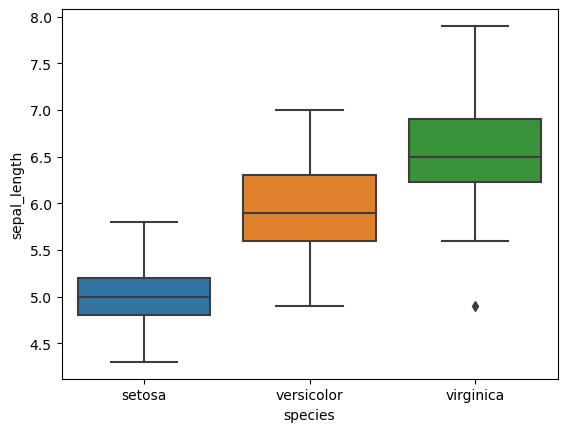

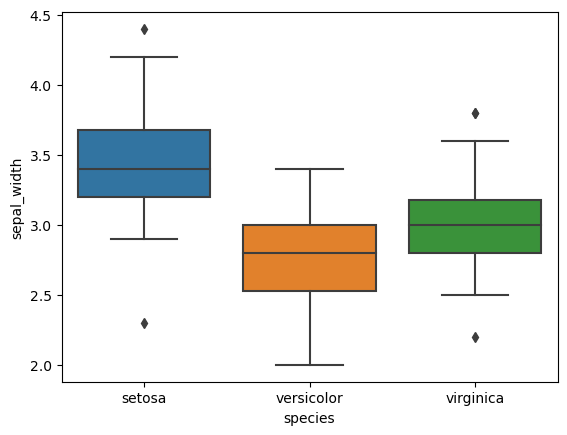

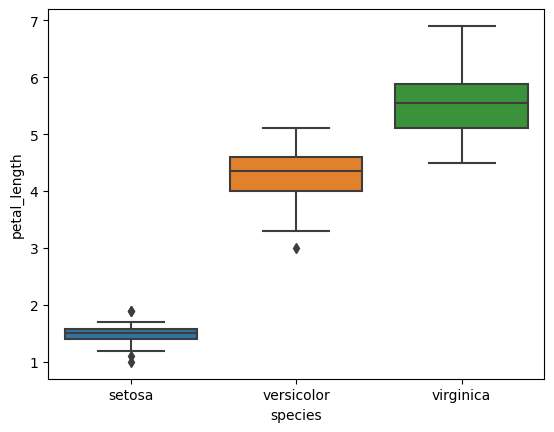

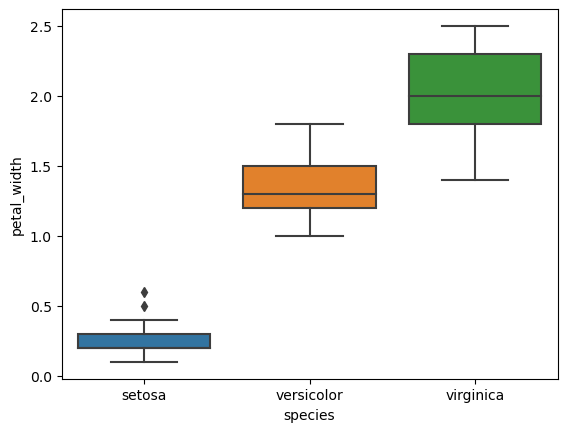

In [12]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df['species'],y=df[i])
    plt.show()

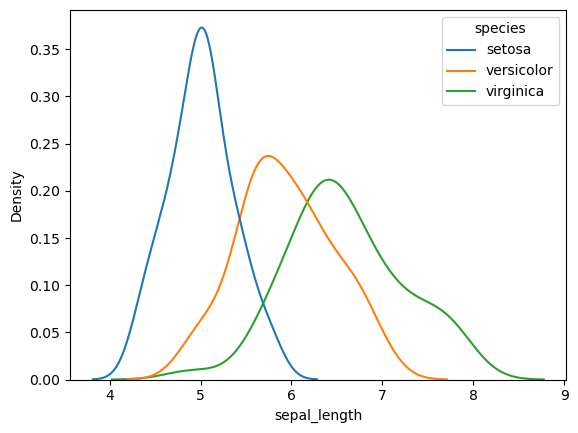

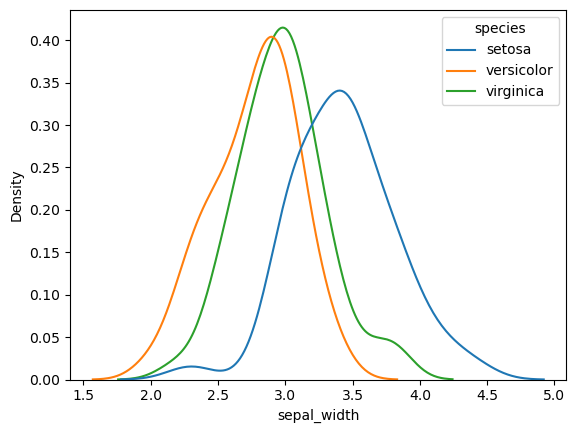

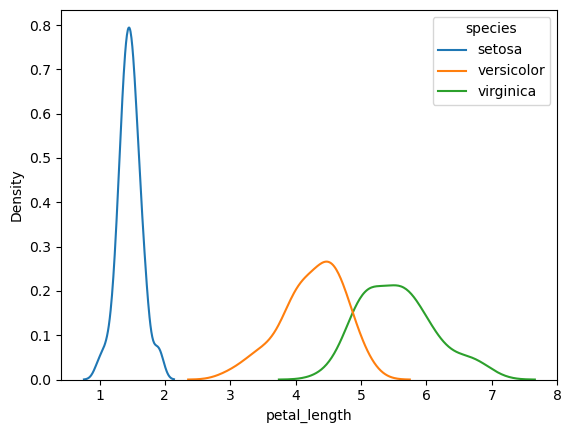

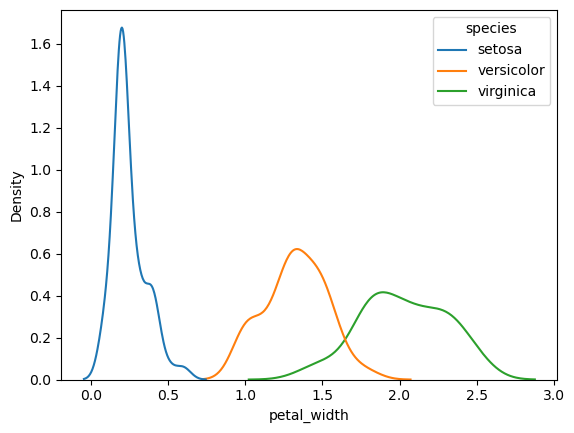

In [18]:
for i in df.select_dtypes(include=np.number).columns:
    sns.kdeplot(x=df[i],hue=df['species'])
    plt.show()

<Axes: >

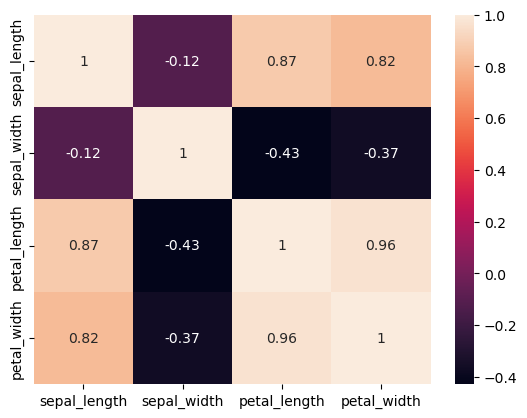

In [22]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

In [23]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


* We have 150 rows and 5 columns.
* No null values present.
* There are 3 unique classes in species column and their numbers are equal.
* There is one duplicated row.
* High correlations are observed between sepal_length, petal_width, and petal_length.
* Setosa has the petal length and petal width values. Both petal length and petal width values are the lower for setosa compared to other classes.

In [24]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]